In [1]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]


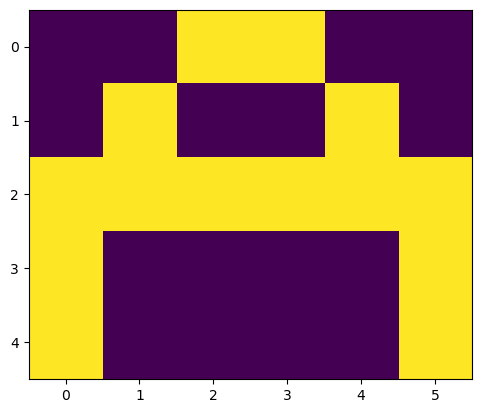

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()


In [3]:
# converting data and labels into numpy array

"""
Convert the matrix of 0 and 1 into one hot vector 
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""

x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), 
								np.array(c).reshape(1, 30)]


# Labels are also converted into NumPy array
y = np.array(y)


print(x, "\n\n", y)


[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [4]:
# activation function

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# out put of layer 2 
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# output of layer 2 
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 




In [5]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)


[[ 1.39986589 -1.15116247 -0.51380063 -0.93160387 -0.06488057]
 [-0.48860211 -0.07877548 -0.91503468 -0.33052908 -0.20764799]
 [ 0.54504857  0.18256966 -0.12749857 -0.1473971  -0.64379052]
 [ 1.21144211 -0.68331721  0.13963638  0.11751267 -0.18740213]
 [-0.78845633  0.59205973  0.93407548  1.42900245  1.16016451]
 [-1.06233583  0.4447093  -1.33680877  0.8546441   2.18483833]
 [ 0.75324153 -1.12957006 -0.6070925   1.18560127 -2.06140188]
 [ 1.36068362  0.47806793 -1.96507905 -0.60080868  0.89032889]
 [-0.01057996  1.0094367   1.02855217  0.10471725 -1.49234578]
 [-0.65209294 -0.29053965 -1.98646573 -0.32626442 -1.44123815]
 [ 0.6510506   1.10404625  0.52322022  0.32811864 -1.48903588]
 [ 0.97133567 -0.44564222  0.1155109  -1.67823044  2.14979237]
 [ 1.92512144  0.60605987 -0.45328809  0.82706706 -0.61899309]
 [ 2.34585431  0.00490545 -1.07688519 -1.9488169  -0.13198528]
 [-0.763805   -1.64021955 -1.56642254 -0.66212674  0.23835371]
 [ 1.64286716  1.37796    -1.67571318  0.21963718  0.23

In [6]:
"""The arguments of train function are data set list x, 
correct labels y, weights w1, w2, learning rate = 0.1, 
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of 
trained weights w1, w2"""

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)


epochs: 1 ======== acc: 75.51979291523054
epochs: 2 ======== acc: 76.14946283494365
epochs: 3 ======== acc: 76.67484369425343
epochs: 4 ======== acc: 77.12781029957225
epochs: 5 ======== acc: 77.5312811929072
epochs: 6 ======== acc: 77.90151114423642
epochs: 7 ======== acc: 78.24986704797702
epochs: 8 ======== acc: 78.58416399719262
epochs: 9 ======== acc: 78.90966424827484
epochs: 10 ======== acc: 79.22981696409062
epochs: 11 ======== acc: 79.5467949128471
epochs: 12 ======== acc: 79.86187467628842
epochs: 13 ======== acc: 80.17570243464533
epochs: 14 ======== acc: 80.48848127896116
epochs: 15 ======== acc: 80.80010699501695
epochs: 16 ======== acc: 81.11026974026134
epochs: 17 ======== acc: 81.41853152552764
epochs: 18 ======== acc: 81.72438488534195
epochs: 19 ======== acc: 82.02729612300558
epochs: 20 ======== acc: 82.32673600361902
epochs: 21 ======== acc: 82.6222007710484
epochs: 22 ======== acc: 82.91322628716925
epochs: 23 ======== acc: 83.19939772069013
epochs: 24 ======== acc

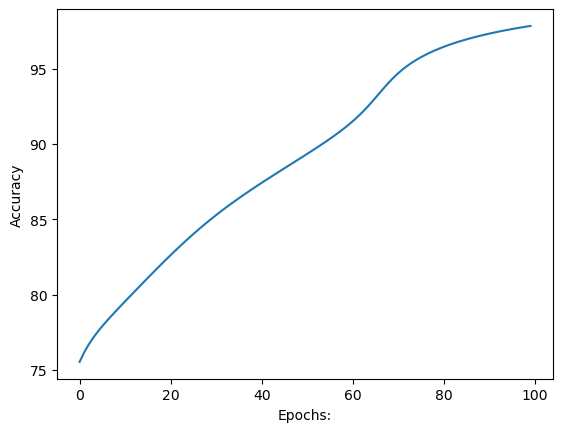

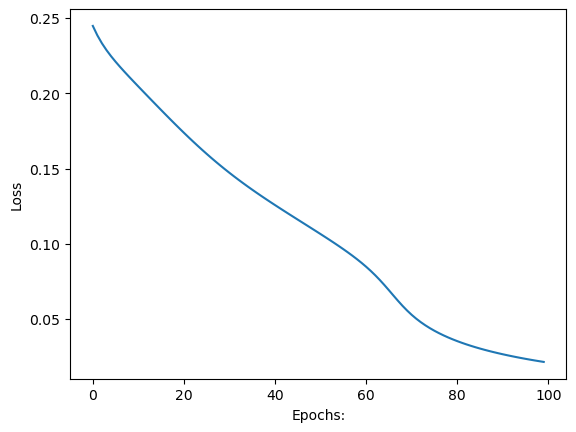

In [7]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()


In [8]:
# the trained weights are
print(w1, "\n", w2)


[[ 1.39986589 -1.15116247 -0.51380063 -0.93160387 -0.06488057]
 [-0.49677677  0.29999305 -0.27593609 -0.08166985 -0.54932731]
 [ 0.53690779  0.02963319  0.51298315 -0.0576345  -0.71483727]
 [ 1.20330133 -0.83625368  0.78011811  0.20727527 -0.25844888]
 [-0.796631    0.97082826  1.57317406  1.67786169  0.81848519]
 [-1.06233583  0.4447093  -1.33680877  0.8546441   2.18483833]
 [ 0.75324153 -1.12957006 -0.6070925   1.18560127 -2.06140188]
 [ 1.35254285  0.32513146 -1.32459733 -0.51104608  0.81928215]
 [-0.01057996  1.0094367   1.02855217  0.10471725 -1.49234578]
 [-0.65209294 -0.29053965 -1.98646573 -0.32626442 -1.44123815]
 [ 0.65133566  0.95093304  0.48672104 -0.40258797 -1.3266296 ]
 [ 0.97133567 -0.44564222  0.1155109  -1.67823044  2.14979237]
 [ 1.92515533  0.07435487 -0.45190495  0.66797043 -0.34836052]
 [ 2.33771354 -0.14803102 -0.43640347 -1.8590543  -0.20303203]
 [-0.76351994 -1.79333276 -1.60292172 -1.39283335  0.40076   ]
 [ 1.64315222  1.2248468  -1.71221236 -0.51106942  0.40

Image is of letter B.


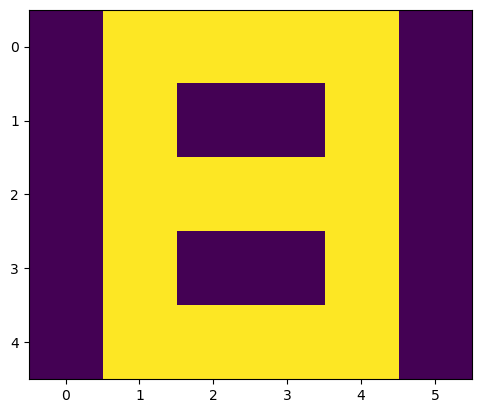

In [9]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)
